In [2]:
# Import libraries
import numpy as np
import pandas as pd
import re
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from difflib import get_close_matches
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Importing dataset
# raw_data = pd.read_csv("Data/hindi_movies_dataset.csv")
raw_data = pd.read_csv("Data/bollywood_full.csv")
raw_data.head(5)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)


In [31]:
raw_data.describe()

,is_adult,imdb_rating,imdb_votes
count,4330.0,4317.000000,4317.000000
mean,0.0,5.911744,2387.874913
std,0.0,1.330077,9404.126400
min,0.0,0.000000,0.000000
25%,0.0,5.100000,32.000000
50%,0.0,6.100000,131.000000
75%,0.0,6.900000,966.000000
max,0.0,9.400000,310481.000000


In [32]:
# Total number of data points and columns
raw_data.shape

(4330, 18)

In [33]:
raw_data.columns

Index(['title_x', 'imdb_id', 'poster_path', 'wiki_link', 'title_y',
       'original_title', 'is_adult', 'year_of_release', 'runtime', 'genres',
       'imdb_rating', 'imdb_votes', 'story', 'summary', 'tagline', 'actors',
       'wins_nominations', 'release_date'],
      dtype='object')

In [34]:
# checking if any duplicates
raw_data[raw_data.duplicated()]

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date


In [35]:
# Selecting usefull features
# df = raw_data[['genre','movie_name','year','cast', 'director']]
df = raw_data[['genres','title_x','year_of_release','actors',]]

In [36]:
df['title_x']

0                   Uri: The Surgical Strike
1                              Battalion 609
2       The Accidental Prime Minister (film)
3                            Why Cheat India
4                            Evening Shadows
                        ...                 
4325                     Samadhi (1950 film)
4326                     Sangram (1950 film)
4327                      Sargam (1950 film)
4328                Sheesh Mahal (1950 film)
4329                     Meena Bazaar (film)
Name: title_x, Length: 4330, dtype: object

In [37]:

df['title_x'] = df['title_x'].str.replace(' (film)', '', regex=False)

In [38]:
df['title_x'] = df['title_x'].str.replace(r' \(film\)', '', regex=True, case=False)

In [39]:
df['title_x']

0            Uri: The Surgical Strike
1                       Battalion 609
2       The Accidental Prime Minister
3                     Why Cheat India
4                     Evening Shadows
                    ...              
4325              Samadhi (1950 film)
4326              Sangram (1950 film)
4327               Sargam (1950 film)
4328         Sheesh Mahal (1950 film)
4329                     Meena Bazaar
Name: title_x, Length: 4330, dtype: object

In [40]:
df['title_x'] = df['title_x'].apply(lambda x: re.sub(r'\s*[\(\[].*?[\)\]]\s*$', '', x))

In [41]:
df['title_x'] = df['title_x'].apply(lambda x: re.sub(r'\s*\([^)]*\)\s*$', '', x))

In [42]:
df['title_x']

0            Uri: The Surgical Strike
1                       Battalion 609
2       The Accidental Prime Minister
3                     Why Cheat India
4                     Evening Shadows
                    ...              
4325                          Samadhi
4326                          Sangram
4327                           Sargam
4328                     Sheesh Mahal
4329                     Meena Bazaar
Name: title_x, Length: 4330, dtype: object

In [43]:
# column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4330 entries, 0 to 4329
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   genres           4330 non-null   object
 1   title_x          4330 non-null   object
 2   year_of_release  4330 non-null   object
 3   actors           4320 non-null   object
dtypes: object(4)
memory usage: 135.4+ KB


In [44]:
df

,genres,title_x,year_of_release,actors
0,Action|Drama|War,Uri: The Surgical Strike,2019,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...
1,War,Battalion 609,2019,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...
2,Biography|Drama,The Accidental Prime Minister,2019,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...
3,Crime|Drama,Why Cheat India,2019,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...
4,Drama,Evening Shadows,2018,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...
...,...,...,...,...
4325,Drama,Samadhi,1950,Ashok Kumar|Nalini Jaywant|Kuldip Kaur|Shyam|M...
4326,Drama,Sangram,1950,Ashok Kumar|Nalini Jaywant|Nawab|Sajjan|Tiwari...
4327,Drama|Family,Sargam,1950,Raj Kapoor|Rehana|Om Prakash|David Abraham|Rad...
4328,Drama,Sheesh Mahal,1950,Sohrab Modi|Naseem Banu|Pushpa Hans|Nigar Sult...


In [45]:
# Ensure 'title_y' column is of string type
df['title_x'] = df['title_x'].astype(str)

In [46]:
# Optional: Check if the conversion was successful
print(df['title_x'].dtype)  # Should output: object

object


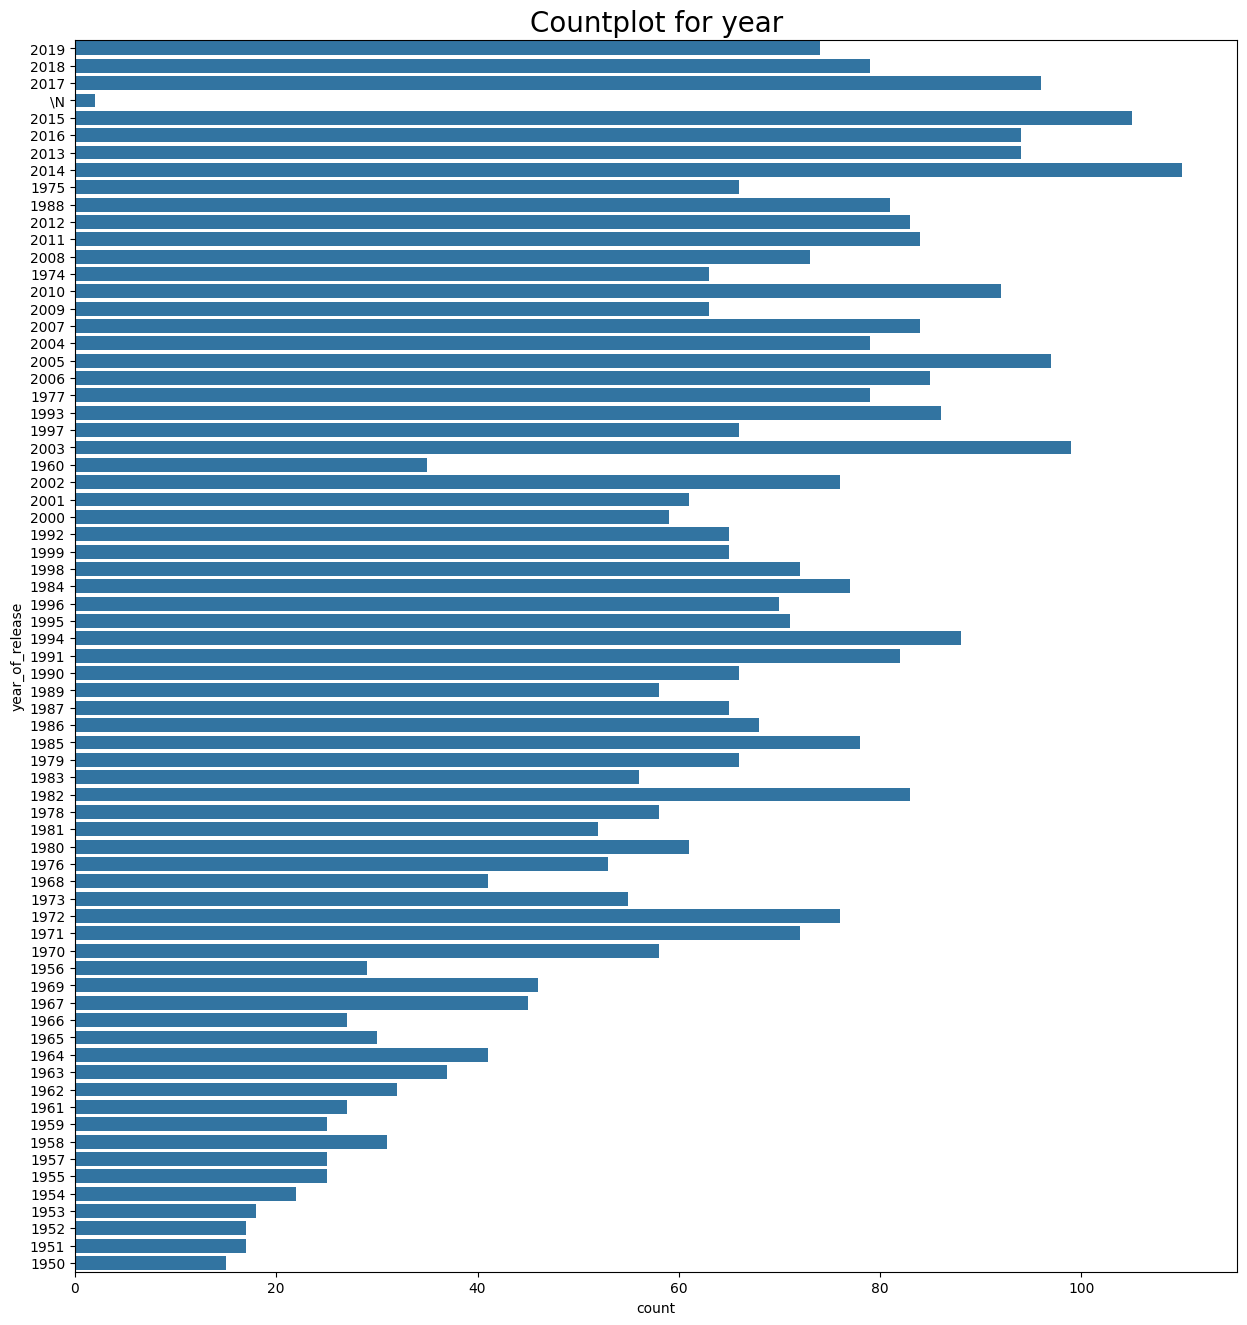

In [47]:
plt.figure(figsize=[15,16])
sns.countplot(data=df, y='year_of_release')
plt.title('Countplot for year', fontsize = 20)
plt.show()

In [48]:
# Now we are not using year column also
df = df.drop("year_of_release", axis=1)

In [49]:
# Cheking null values
df.isna().sum()

genres      0
title_x     0
actors     10
dtype: int64

In [50]:
# Filing nan value with blank string
df['genres'] = df['genres'].replace(np.nan," ")
df['actors'] = df['actors'].replace(np.nan," ")


In [51]:
df

,genres,title_x,actors
0,Action|Drama|War,Uri: The Surgical Strike,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...
1,War,Battalion 609,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...
2,Biography|Drama,The Accidental Prime Minister,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...
3,Crime|Drama,Why Cheat India,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...
4,Drama,Evening Shadows,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...
...,...,...,...
4325,Drama,Samadhi,Ashok Kumar|Nalini Jaywant|Kuldip Kaur|Shyam|M...
4326,Drama,Sangram,Ashok Kumar|Nalini Jaywant|Nawab|Sajjan|Tiwari...
4327,Drama|Family,Sargam,Raj Kapoor|Rehana|Om Prakash|David Abraham|Rad...
4328,Drama,Sheesh Mahal,Sohrab Modi|Naseem Banu|Pushpa Hans|Nigar Sult...


In [52]:
#tmdb = TMDb()
# tmdb.api_key = 'a8f3c31b4bc4c4de56e1affe22e456ff'

# importing tmdb
from tmdbv3api import TMDb,Movie
import json
import requests #for making HTTP requests

# Creating TMDB Api Object
tmdb = TMDb()
# tmdb.api_key = 'a8f3c31b4bc4c4de56e1affe22e456ff'
tmdb.api_key = 'c6c09d114effb5caac5eba5a761473a2'
tmdb_movie = Movie()

# OMDB API key
omdb_api_key = '338007de'

def get_movie_details(title):
    try:
        title = str(title).strip()
        result = tmdb_movie.search(title)
        if result:
            movie_id = result[0].id
            response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={tmdb.api_key}')
            data_json = response.json()
            
            # Check if the data structure is correct
            if not isinstance(data_json, dict):
                raise ValueError("Invalid data structure from TMDb")

            # Fetching movie genre
            movie_genres = [str(genre.get('name', '')) for genre in data_json.get('genres', [])]
            genre = ", ".join(movie_genres)
            
            # Fetching vote average and vote count
            vote_average = data_json.get('vote_average', np.nan)
            vote_count = data_json.get('vote_count', np.nan)
        else:
            raise ValueError("No results from TMDb")
    except Exception as e:
        print(f"Error processing {title} with TMDb: {e}")
        genre, vote_average, vote_count = get_movie_details_from_omdb(title)
    
    return genre, vote_average, vote_count

def get_movie_details_from_omdb(title):
    try:
        response = requests.get(f'http://www.omdbapi.com/?t={title}&apikey={omdb_api_key}')
        data_json = response.json()
        
        if data_json.get('Response') == 'True':
            # Fetching movie genre
            genre = data_json.get('Genre', 'N/A')
            
            # Fetching vote average and vote count
            vote_average = float(data_json.get('imdbRating', np.nan))
            vote_count = int(data_json.get('imdbVotes', '0').replace(',', ''))
        else:
            genre, vote_average, vote_count = "N/A", np.nan, np.nan
    except Exception as e:
        print(f"Error processing {title} with OMDb: {e}")
        genre, vote_average, vote_count = "N/A", np.nan, np.nan
    
    return genre, vote_average, vote_count





In [53]:
# Apply the function to get movie details
tqdm.pandas()

In [54]:
def apply_get_movie_details(row):
    title = row['title_x']
    genre, vote_average, vote_count = get_movie_details(title)
    return pd.Series({'TMDB_Genre': genre, 'Vote_Average': vote_average, 'Vote_Count': vote_count})

In [55]:
# df['movie_name'] = df['movie_name'].astype(str)

In [56]:
# Apply the function to the DataFrame with a progress bar
df[['TMDB_Genre', 'Vote_Average', 'Vote_Count']] = df.progress_apply(apply_get_movie_details, axis=1)

  0%|          | 19/4330 [00:01<05:45, 12.49it/s]

Error processing Risknamaa with TMDb: attribute name must be string, not 'int'


  1%|          | 23/4330 [00:02<06:28, 11.09it/s]

Error processing Risknamaa with OMDb: could not convert string to float: 'N/A'


  4%|▎         | 156/4330 [00:12<04:03, 17.12it/s]

Error processing Jack and Dil with TMDb: attribute name must be string, not 'int'


  4%|▍         | 190/4330 [00:14<04:09, 16.58it/s]

Error processing Ek Thi Rani Aisi Bhi with TMDb: attribute name must be string, not 'int'


  6%|▌         | 258/4330 [00:19<04:02, 16.80it/s]

Error processing Saankal with TMDb: attribute name must be string, not 'int'


  7%|▋         | 294/4330 [00:21<04:02, 16.64it/s]

Error processing Murari the Mad Gentleman with TMDb: attribute name must be string, not 'int'
Error processing Murari the Mad Gentleman with OMDb: could not convert string to float: 'N/A'


  8%|▊         | 346/4330 [00:24<03:59, 16.61it/s]

Error processing Dongari Ka Raja with TMDb: attribute name must be string, not 'int'


  9%|▊         | 372/4330 [00:26<03:48, 17.29it/s]

Error processing Mumbai Can Dance Saala with TMDb: attribute name must be string, not 'int'


  9%|▉         | 404/4330 [00:28<05:16, 12.39it/s]

Error processing Dilliwali Zaalim Girlfriend with TMDb: attribute name must be string, not 'int'


 10%|▉         | 428/4330 [00:29<03:49, 16.99it/s]

Error processing Main Hoon Part-Time Killer with TMDb: attribute name must be string, not 'int'
Error processing Kaun Kitne Paani Mein with TMDb: attribute name must be string, not 'int'


 11%|█         | 478/4330 [00:33<04:07, 15.57it/s]

Error processing Dee Saturday Night with TMDb: attribute name must be string, not 'int'
Error processing Dee Saturday Night with OMDb: could not convert string to float: 'N/A'


 12%|█▏        | 512/4330 [00:35<03:44, 17.03it/s]

Error processing Kaanchi: The Unbreakable with TMDb: attribute name must be string, not 'int'


 15%|█▍        | 630/4330 [00:43<05:08, 11.98it/s]

Error processing Once Upon ay Time in Mumbai Dobaara! with TMDb: attribute name must be string, not 'int'


 16%|█▋        | 706/4330 [00:48<03:41, 16.37it/s]

Error processing Paanch Ghantey Mien Paanch Crore with TMDb: attribute name must be string, not 'int'


 17%|█▋        | 716/4330 [00:49<03:29, 17.28it/s]

Error processing Jalpari: The Desert Mermaid with TMDb: attribute name must be string, not 'int'


 17%|█▋        | 732/4330 [00:50<03:45, 15.96it/s]

Error processing Ata Pata Laapata with TMDb: attribute name must be string, not 'int'


 18%|█▊        | 786/4330 [00:54<03:42, 15.95it/s]

Error processing Dear Friend Hitler with TMDb: attribute name must be string, not 'int'


 19%|█▉        | 844/4330 [00:58<03:39, 15.88it/s]

Error processing Sukhmani: Hope for Life with TMDb: attribute name must be string, not 'int'


 21%|██        | 900/4330 [01:02<03:33, 16.05it/s]

Error processing Malik Ek with TMDb: attribute name must be string, not 'int'


 21%|██        | 910/4330 [01:03<03:41, 15.42it/s]

Error processing Toonpur Ka Super Hero with TMDb: attribute name must be string, not 'int'


 21%|██        | 916/4330 [01:03<03:19, 17.09it/s]

Error processing Dunno Y... Na Jaane Kyon with TMDb: attribute name must be string, not 'int'


 24%|██▍       | 1032/4330 [01:11<03:26, 16.00it/s]

Error processing Hari Puttar: A Comedy of Terrors with TMDb: attribute name must be string, not 'int'


 24%|██▍       | 1048/4330 [01:12<03:36, 15.19it/s]

Error processing Wafa: A Deadly Love Story with TMDb: attribute name must be string, not 'int'


 25%|██▍       | 1065/4330 [01:13<04:05, 13.27it/s]

Error processing Aur Pappu Paas Ho Gaya with TMDb: attribute name must be string, not 'int'


 25%|██▌       | 1093/4330 [01:15<03:20, 16.15it/s]

Error processing Jahan Jaaeyega Hamen Paaeyega with TMDb: attribute name must be string, not 'int'


 25%|██▌       | 1101/4330 [01:16<03:13, 16.70it/s]

Error processing Kudiyon Ka Hai Zamana with TMDb: attribute name must be string, not 'int'


 26%|██▌       | 1127/4330 [01:17<03:24, 15.69it/s]

Error processing Salaam-e-Ishq: A Tribute to Love with TMDb: attribute name must be string, not 'int'


 26%|██▋       | 1143/4330 [01:19<04:13, 12.58it/s]

Error processing Zamaanat with TMDb: attribute name must be string, not 'int'


 27%|██▋       | 1153/4330 [01:19<03:35, 14.77it/s]

Error processing Aisa Kyon Hota Hai? with TMDb: attribute name must be string, not 'int'


 29%|██▊       | 1237/4330 [01:28<03:12, 16.09it/s]

Error processing Bhola in Bollywood with TMDb: attribute name must be string, not 'int'


 29%|██▊       | 1243/4330 [01:29<03:00, 17.07it/s]

Error processing Chetna: The Excitement with TMDb: attribute name must be string, not 'int'


 30%|███       | 1319/4330 [01:34<03:16, 15.35it/s]

Error processing Waqt: The Race Against Time with TMDb: attribute name must be string, not 'int'
Error processing Vidyaarthi with TMDb: attribute name must be string, not 'int'


 31%|███       | 1325/4330 [01:34<03:06, 16.14it/s]

Error processing Zameer: The Fire Within with TMDb: attribute name must be string, not 'int'


 31%|███       | 1340/4330 [01:35<02:55, 17.07it/s]

Error processing Agnipankh with TMDb: attribute name must be string, not 'int'
Error processing Agnipankh with OMDb: could not convert string to float: 'N/A'


 32%|███▏      | 1375/4330 [01:37<02:59, 16.43it/s]

Error processing Meenaxi: A Tale of Three Cities with TMDb: attribute name must be string, not 'int'


 32%|███▏      | 1379/4330 [01:38<02:50, 17.27it/s]

Error processing Meri Biwi Ka Jawaab Nahin with TMDb: attribute name must be string, not 'int'


 32%|███▏      | 1405/4330 [01:40<03:11, 15.31it/s]

Error processing Thoda Tum Badlo Thoda Hum with TMDb: attribute name must be string, not 'int'


 33%|███▎      | 1423/4330 [01:41<03:04, 15.76it/s]

Error processing Aaj Ka Andha Kanoon with TMDb: attribute name must be string, not 'int'


 34%|███▎      | 1461/4330 [01:43<02:51, 16.69it/s]

Error processing Kagaar: Life on the Edge with TMDb: attribute name must be string, not 'int'
Error processing Khel – No Ordinary Game with TMDb: attribute name must be string, not 'int'


 35%|███▍      | 1515/4330 [01:47<04:13, 11.11it/s]

Error processing Ansh: The Deadly Part with TMDb: attribute name must be string, not 'int'


 35%|███▌      | 1523/4330 [01:48<03:15, 14.34it/s]

Error processing Be-Lagaam with TMDb: attribute name must be string, not 'int'


 36%|███▌      | 1539/4330 [01:49<02:53, 16.08it/s]

Error processing Kabhie Tum Kabhie Hum with TMDb: attribute name must be string, not 'int'


 36%|███▋      | 1571/4330 [01:51<02:47, 16.43it/s]

Error processing Yeh Kaisi Mohabbat with TMDb: attribute name must be string, not 'int'


 37%|███▋      | 1617/4330 [01:54<02:44, 16.45it/s]

Error processing Hadh: Life on the Edge of Death with TMDb: attribute name must be string, not 'int'


 38%|███▊      | 1660/4330 [01:57<02:39, 16.78it/s]

Error processing Dhai Akshar Prem Ke with TMDb: attribute name must be string, not 'int'


 38%|███▊      | 1666/4330 [01:57<02:49, 15.73it/s]

Error processing Hari-Bhari with TMDb: attribute name must be string, not 'int'


 39%|███▉      | 1688/4330 [01:58<02:33, 17.17it/s]

Error processing Nidaan with TMDb: attribute name must be string, not 'int'


 39%|███▉      | 1693/4330 [01:59<02:29, 17.61it/s]

Error processing Meri Jung Ka Elaan with TMDb: attribute name must be string, not 'int'
Error processing The Revenge: Geeta Mera Naam with TMDb: attribute name must be string, not 'int'


 40%|███▉      | 1723/4330 [02:00<02:41, 16.15it/s]

Error processing Heeralal Pannalal with TMDb: attribute name must be string, not 'int'


 40%|███▉      | 1727/4330 [02:01<02:35, 16.75it/s]

Error processing Jahan Tum Le Chalo with TMDb: attribute name must be string, not 'int'


 40%|████      | 1751/4330 [02:02<02:35, 16.63it/s]

Error processing Vaastav: The Reality with TMDb: attribute name must be string, not 'int'


 42%|████▏     | 1835/4330 [02:08<02:29, 16.63it/s]

Error processing Vinashak – Destroyer with TMDb: attribute name must be string, not 'int'


 43%|████▎     | 1879/4330 [02:11<02:35, 15.76it/s]

Error processing Mrityudata with TMDb: attribute name must be string, not 'int'
Error processing Mere Sapno Ki Rani with TMDb: attribute name must be string, not 'int'
Error processing Mr. and Mrs. Khiladi with TMDb: attribute name must be string, not 'int'


 44%|████▎     | 1885/4330 [02:11<02:27, 16.61it/s]

Error processing Krishna Arjun with TMDb: attribute name must be string, not 'int'


 44%|████▍     | 1901/4330 [02:12<02:35, 15.57it/s]

Error processing Ghatak: Lethal with TMDb: attribute name must be string, not 'int'


 44%|████▍     | 1909/4330 [02:13<02:32, 15.90it/s]

Error processing Aisi Bhi Kya Jaldi Hai with TMDb: attribute name must be string, not 'int'


 45%|████▍     | 1930/4330 [02:14<02:28, 16.19it/s]

Error processing Is Raat Ki Subah Nahin with TMDb: attribute name must be string, not 'int'


 45%|████▍     | 1946/4330 [02:15<02:22, 16.78it/s]

Error processing Muqadar with TMDb: attribute name must be string, not 'int'


 46%|████▋     | 2003/4330 [02:19<02:11, 17.71it/s]

Error processing Kalyug Ke Avtaar with TMDb: attribute name must be string, not 'int'
Error processing Ham Sab Chor Hain with TMDb: attribute name must be string, not 'int'


 47%|████▋     | 2017/4330 [02:20<02:22, 16.29it/s]

Error processing Param Vir Chakra with TMDb: attribute name must be string, not 'int'


 47%|████▋     | 2037/4330 [02:21<03:13, 11.88it/s]

Error processing Sarhad: The Border of Crime with TMDb: attribute name must be string, not 'int'


 48%|████▊     | 2061/4330 [02:23<02:15, 16.78it/s]

Error processing Amanaat with TMDb: attribute name must be string, not 'int'


 48%|████▊     | 2081/4330 [02:24<02:18, 16.18it/s]

Error processing Do Fantoosh with TMDb: attribute name must be string, not 'int'


 48%|████▊     | 2085/4330 [02:24<02:11, 17.06it/s]

Error processing Ganga Aur Ranga with TMDb: attribute name must be string, not 'int'


 48%|████▊     | 2095/4330 [02:25<02:17, 16.29it/s]

Error processing Ishq Mein Jeena Ishq Mein Marna with TMDb: attribute name must be string, not 'int'


 49%|████▉     | 2131/4330 [02:27<02:09, 16.92it/s]

Error processing Aashik Awara with TMDb: attribute name must be string, not 'int'


 49%|████▉     | 2143/4330 [02:28<02:12, 16.55it/s]

Error processing Chahoonga Main Tujhe with TMDb: attribute name must be string, not 'int'


 50%|████▉     | 2146/4330 [02:28<02:03, 17.62it/s]

Error processing Bhookamp with TMDb: attribute name must be string, not 'int'


 51%|█████     | 2193/4330 [02:31<02:12, 16.08it/s]

Error processing Phoolan Hasina Ramkali with TMDb: attribute name must be string, not 'int'
Error processing Sangraam with TMDb: attribute name must be string, not 'int'


 51%|█████     | 2197/4330 [02:31<02:10, 16.30it/s]

Error processing Sangraam with OMDb: could not convert string to float: 'N/A'


 51%|█████▏    | 2221/4330 [02:33<02:01, 17.38it/s]

Error processing Meera Ka Mohan with TMDb: attribute name must be string, not 'int'


 52%|█████▏    | 2241/4330 [02:34<02:12, 15.80it/s]

Error processing Jaan Se Pyaara with TMDb: attribute name must be string, not 'int'


 52%|█████▏    | 2249/4330 [02:35<02:05, 16.55it/s]

Error processing Sapne Sajan Ke with TMDb: attribute name must be string, not 'int'


 53%|█████▎    | 2283/4330 [02:37<02:01, 16.85it/s]

Error processing Ayee Milan Ki Raat with TMDb: attribute name must be string, not 'int'
Error processing Aaj Ka Samson with TMDb: attribute name must be string, not 'int'


 53%|█████▎    | 2307/4330 [02:38<02:00, 16.72it/s]

Error processing Ghar Parivar with TMDb: attribute name must be string, not 'int'
Error processing Ghar Parivar with OMDb: could not convert string to float: 'N/A'


 53%|█████▎    | 2311/4330 [02:38<01:54, 17.62it/s]

Error processing Jaan Pechaan with TMDb: attribute name must be string, not 'int'
Error processing Jaan Pechaan with OMDb: could not convert string to float: 'N/A'


 54%|█████▎    | 2325/4330 [02:39<02:01, 16.50it/s]

Error processing Mehandi Ban Gai Khoon with TMDb: attribute name must be string, not 'int'
Error processing Mehandi Ban Gai Khoon with OMDb: could not convert string to float: 'N/A'


 54%|█████▍    | 2353/4330 [02:42<05:07,  6.43it/s]

Error processing Swarg Jaisaa Ghar with TMDb: attribute name must be string, not 'int'
Error processing Swarg Jaisaa Ghar with OMDb: could not convert string to float: 'N/A'


 54%|█████▍    | 2356/4330 [02:42<05:14,  6.28it/s]

Error processing Shiv Ram with TMDb: attribute name must be string, not 'int'


 55%|█████▍    | 2361/4330 [02:43<05:31,  5.94it/s]

Error processing Aaj Ke Shahenshah with TMDb: attribute name must be string, not 'int'
Error processing Yeh Aag Kab Bujhegi with TMDb: attribute name must be string, not 'int'


 55%|█████▍    | 2362/4330 [02:43<05:11,  6.32it/s]

Error processing Amiri Garibi with TMDb: attribute name must be string, not 'int'


 55%|█████▍    | 2367/4330 [02:44<06:42,  4.87it/s]

Error processing Awaaz De Kahan Hai with TMDb: attribute name must be string, not 'int'


 55%|█████▌    | 2393/4330 [02:49<05:30,  5.86it/s]

Error processing Jai Shiv Shankar with TMDb: attribute name must be string, not 'int'
Error processing Kaarnama with TMDb: attribute name must be string, not 'int'
Error processing Kaarnama with OMDb: could not convert string to float: 'N/A'


 56%|█████▌    | 2404/4330 [02:52<06:24,  5.01it/s]

Error processing Pati Patni Aur Tawaif with TMDb: attribute name must be string, not 'int'


 56%|█████▌    | 2406/4330 [02:52<05:39,  5.67it/s]

Error processing Kali Ganga with TMDb: attribute name must be string, not 'int'


 56%|█████▌    | 2413/4330 [02:53<04:25,  7.21it/s]

Error processing Pyar Ke Naam Qurbaan with TMDb: attribute name must be string, not 'int'


 56%|█████▋    | 2436/4330 [02:58<06:21,  4.97it/s]

Error processing Dav Pech with TMDb: attribute name must be string, not 'int'


 57%|█████▋    | 2456/4330 [03:02<06:08,  5.08it/s]

Error processing Jaisi Karni Waisi Bharnii with TMDb: attribute name must be string, not 'int'


 57%|█████▋    | 2483/4330 [03:08<07:02,  4.37it/s]

Error processing Vicky Daada with TMDb: attribute name must be string, not 'int'


 57%|█████▋    | 2489/4330 [03:10<06:19,  4.86it/s]

Error processing Andha Yudh with TMDb: attribute name must be string, not 'int'


 58%|█████▊    | 2514/4330 [03:16<06:05,  4.97it/s]

Error processing Jungle Ki Beti with TMDb: attribute name must be string, not 'int'


 58%|█████▊    | 2531/4330 [03:20<06:11,  4.85it/s]

Error processing Paanch Fauladi with TMDb: attribute name must be string, not 'int'


 59%|█████▊    | 2543/4330 [03:22<05:03,  5.89it/s]

Error processing Pyaar Ka Mandir with TMDb: attribute name must be string, not 'int'


 59%|█████▉    | 2550/4330 [03:23<06:24,  4.63it/s]

Error processing Soorma Bhopali with TMDb: attribute name must be string, not 'int'


 60%|██████    | 2598/4330 [03:34<05:09,  5.60it/s]

Error processing Jhanjhaar with TMDb: attribute name must be string, not 'int'


 60%|██████    | 2600/4330 [03:34<04:53,  5.90it/s]

Error processing Madadgaar with TMDb: attribute name must be string, not 'int'


 61%|██████    | 2621/4330 [03:39<04:58,  5.73it/s]

Error processing Susman with TMDb: attribute name must be string, not 'int'


 61%|██████    | 2648/4330 [03:45<07:40,  3.65it/s]

Error processing Dosti Dushmani with TMDb: attribute name must be string, not 'int'


 62%|██████▏   | 2663/4330 [03:48<06:05,  4.57it/s]

Error processing Khel Mohabbat Ka with TMDb: attribute name must be string, not 'int'


 62%|██████▏   | 2680/4330 [03:51<04:49,  5.71it/s]

Error processing Pyaar Ke Do Pal with TMDb: attribute name must be string, not 'int'


 62%|██████▏   | 2700/4330 [03:55<04:40,  5.81it/s]

Error processing Ameer Aadmi Gharib Aadmi with TMDb: attribute name must be string, not 'int'


 63%|██████▎   | 2709/4330 [03:57<05:07,  5.26it/s]

Error processing Bhago Bhut Aaya with TMDb: attribute name must be string, not 'int'


 63%|██████▎   | 2715/4330 [03:58<05:33,  4.85it/s]

Error processing Durgaa with TMDb: attribute name must be string, not 'int'


 63%|██████▎   | 2730/4330 [04:01<04:52,  5.47it/s]

Error processing Kabhie Ajnabi The with TMDb: attribute name must be string, not 'int'


 63%|██████▎   | 2740/4330 [04:04<05:08,  5.15it/s]

Error processing Karm Yudh with TMDb: attribute name must be string, not 'int'


 63%|██████▎   | 2745/4330 [04:05<05:20,  4.95it/s]

Error processing Meraa Ghar Mere Bachche with TMDb: attribute name must be string, not 'int'


 64%|██████▍   | 2763/4330 [04:08<05:16,  4.96it/s]

Error processing Ram Tere Kitne Naam with TMDb: attribute name must be string, not 'int'


 64%|██████▍   | 2774/4330 [04:11<05:31,  4.69it/s]

Error processing Aaj Ki Awaaz with TMDb: attribute name must be string, not 'int'


 65%|██████▌   | 2825/4330 [04:22<05:04,  4.94it/s]

Error processing Vayanadan Thamban with TMDb: attribute name must be string, not 'int'


 66%|██████▌   | 2843/4330 [04:26<04:21,  5.69it/s]

Error processing Waqt Ki Pukar with TMDb: attribute name must be string, not 'int'
Error processing Waqt Ki Pukar with OMDb: could not convert string to float: 'N/A'


 66%|██████▌   | 2854/4330 [04:28<04:25,  5.56it/s]

Error processing Andha Kanoon with TMDb: attribute name must be string, not 'int'
Error processing Arohan with TMDb: attribute name must be string, not 'int'


 66%|██████▌   | 2865/4330 [04:30<04:30,  5.42it/s]

Error processing Ek Baar Chale Aao with TMDb: attribute name must be string, not 'int'


 66%|██████▌   | 2868/4330 [04:31<04:21,  5.60it/s]

Error processing Gehri Chot - Urf: Durdesh with TMDb: attribute name must be string, not 'int'


 66%|██████▋   | 2879/4330 [04:33<04:41,  5.16it/s]

Error processing Log Kya Kahenge with TMDb: attribute name must be string, not 'int'
Error processing Log Kya Kahenge with OMDb: could not convert string to float: 'N/A'


 67%|██████▋   | 2905/4330 [04:39<05:05,  4.66it/s]

Error processing Woh Saat Din with TMDb: attribute name must be string, not 'int'


 67%|██████▋   | 2920/4330 [04:42<04:13,  5.56it/s]

Error processing Baawri with TMDb: attribute name must be string, not 'int'
Error processing Baawri with OMDb: could not convert string to float: 'N/A'


 68%|██████▊   | 2936/4330 [04:45<04:30,  5.15it/s]

Error processing Do Dishayen with TMDb: attribute name must be string, not 'int'


 68%|██████▊   | 2952/4330 [04:49<04:38,  4.94it/s]

Error processing Main Intequam Loonga with TMDb: attribute name must be string, not 'int'


 68%|██████▊   | 2957/4330 [04:49<03:40,  6.22it/s]

Error processing Mehndi Rang Layegi with TMDb: attribute name must be string, not 'int'


 69%|██████▊   | 2973/4330 [04:52<03:43,  6.06it/s]

Error processing Shiv Charan with TMDb: attribute name must be string, not 'int'
Error processing Shiv Charan with OMDb: could not convert string to float: 'N/A'
Error processing Situm with TMDb: attribute name must be string, not 'int'


 69%|██████▉   | 2978/4330 [04:53<03:51,  5.83it/s]

Error processing Taqdeer Ka Badshah with TMDb: attribute name must be string, not 'int'


 69%|██████▉   | 3003/4330 [04:58<04:21,  5.07it/s]

Error processing Jwala Daku with TMDb: attribute name must be string, not 'int'
Error processing Jwala Daku with OMDb: could not convert string to float: 'N/A'


 70%|██████▉   | 3019/4330 [05:01<03:15,  6.69it/s]

Error processing Main Aur Mera Haathi with TMDb: attribute name must be string, not 'int'
Error processing Plot No. 5 with TMDb: attribute name must be string, not 'int'


 70%|██████▉   | 3024/4330 [05:02<03:35,  6.07it/s]

Error processing Kahani Ek Chor Ki with TMDb: attribute name must be string, not 'int'
Error processing Kahani Ek Chor Ki with OMDb: could not convert string to float: 'N/A'


 70%|███████   | 3042/4330 [05:06<04:51,  4.42it/s]

Error processing Zamane Ko Dikhana Hai with TMDb: attribute name must be string, not 'int'
Error processing Zamane Ko Dikhana Hai with OMDb: could not convert string to float: 'N/A'


 71%|███████   | 3073/4330 [05:11<03:49,  5.48it/s]

Error processing Jyoti Bane Jwala with TMDb: attribute name must be string, not 'int'


 72%|███████▏  | 3097/4330 [05:17<03:56,  5.21it/s]

Error processing Taxi Chor with TMDb: attribute name must be string, not 'int'


 72%|███████▏  | 3103/4330 [05:18<03:20,  6.11it/s]

Error processing Aakhri Kasam with TMDb: attribute name must be string, not 'int'


 72%|███████▏  | 3108/4330 [05:18<03:15,  6.24it/s]

Error processing Bagula Bhagat with TMDb: attribute name must be string, not 'int'


 72%|███████▏  | 3128/4330 [05:22<03:20,  6.01it/s]

Error processing Hum Tere Aashiq Hain with TMDb: attribute name must be string, not 'int'


 73%|███████▎  | 3141/4330 [05:25<02:55,  6.78it/s]

Error processing Magroor with TMDb: attribute name must be string, not 'int'


 73%|███████▎  | 3147/4330 [05:25<02:45,  7.16it/s]

Error processing Nagin Aur Suhagin with TMDb: attribute name must be string, not 'int'


 73%|███████▎  | 3151/4330 [05:26<03:12,  6.12it/s]

Error processing Prem Vivah with TMDb: attribute name must be string, not 'int'


 73%|███████▎  | 3170/4330 [05:30<04:23,  4.40it/s]

Error processing Aakhri Daku with TMDb: attribute name must be string, not 'int'


 73%|███████▎  | 3178/4330 [05:32<03:48,  5.03it/s]

Error processing Badalte Rishtey with TMDb: attribute name must be string, not 'int'


 74%|███████▎  | 3188/4330 [05:34<03:59,  4.76it/s]

Error processing Daaku Aur Jawan with TMDb: attribute name must be string, not 'int'


 74%|███████▍  | 3194/4330 [05:35<02:46,  6.83it/s]

Error processing Dil Se Mile Dil with TMDb: attribute name must be string, not 'int'


 74%|███████▍  | 3196/4330 [05:35<02:50,  6.67it/s]

Error processing Heeralaal Pannalal with TMDb: attribute name must be string, not 'int'


 74%|███████▍  | 3201/4330 [05:36<02:31,  7.47it/s]

Error processing Khoon Ka Badla Khoon with TMDb: attribute name must be string, not 'int'


 74%|███████▍  | 3204/4330 [05:37<03:08,  5.98it/s]

Error processing Kondura with TMDb: attribute name must be string, not 'int'


 74%|███████▍  | 3223/4330 [05:41<03:36,  5.12it/s]

Error processing Aakhri Goli with TMDb: attribute name must be string, not 'int'


 75%|███████▍  | 3230/4330 [05:42<02:58,  6.17it/s]

Error processing Abhi To Jee Lein with TMDb: attribute name must be string, not 'int'


 75%|███████▍  | 3231/4330 [05:42<03:05,  5.91it/s]

Error processing Adha Din Aadhi Raat with TMDb: attribute name must be string, not 'int'


 76%|███████▌  | 3272/4330 [05:50<02:51,  6.15it/s]

Error processing Kachcha Chor with TMDb: attribute name must be string, not 'int'


 76%|███████▌  | 3279/4330 [05:52<03:23,  5.16it/s]

Error processing Kissa Kursi Ka with TMDb: attribute name must be string, not 'int'
Error processing Kissa Kursi Ka with OMDb: could not convert string to float: 'N/A'


 76%|███████▌  | 3288/4330 [05:54<03:29,  4.98it/s]

Error processing Pandit Aur Pathan with TMDb: attribute name must be string, not 'int'


 76%|███████▋  | 3303/4330 [05:57<02:45,  6.21it/s]

Error processing Aaj Ka Mahaatma with TMDb: attribute name must be string, not 'int'
Error processing Aaj Ka Ye Ghar with TMDb: attribute name must be string, not 'int'


 77%|███████▋  | 3336/4330 [06:02<02:14,  7.39it/s]

Error processing Mazdoor Zindabaad with TMDb: attribute name must be string, not 'int'


 77%|███████▋  | 3339/4330 [06:02<03:06,  5.30it/s]

Error processing Mrigayaa with TMDb: attribute name must be string, not 'int'


 77%|███████▋  | 3344/4330 [06:03<02:55,  5.62it/s]

Error processing Rakhi Aur Rifle with TMDb: attribute name must be string, not 'int'
Error processing Rangila Ratan with TMDb: attribute name must be string, not 'int'


 77%|███████▋  | 3346/4330 [06:04<03:18,  4.96it/s]

Error processing Sajjo Rani with TMDb: attribute name must be string, not 'int'
Error processing Sajjo Rani with OMDb: could not convert string to float: 'N/A'


 77%|███████▋  | 3354/4330 [06:06<03:24,  4.77it/s]

Error processing Aa Jaa Sanam with TMDb: attribute name must be string, not 'int'


 78%|███████▊  | 3363/4330 [06:07<03:00,  5.37it/s]

Error processing Balak Aur Janwar with TMDb: attribute name must be string, not 'int'


 78%|███████▊  | 3366/4330 [06:08<02:50,  5.66it/s]

Error processing Dafaa 302 with TMDb: attribute name must be string, not 'int'
Error processing Dafaa 302 with OMDb: could not convert string to float: 'N/A'


 78%|███████▊  | 3372/4330 [06:09<02:20,  6.82it/s]

Error processing Charandas Chor with TMDb: attribute name must be string, not 'int'


 78%|███████▊  | 3381/4330 [06:11<02:47,  5.65it/s]

Error processing Jaan Hazir Hai with TMDb: attribute name must be string, not 'int'


 78%|███████▊  | 3389/4330 [06:12<02:51,  5.49it/s]

Error processing Kahte Hain Mujhko Raja with TMDb: attribute name must be string, not 'int'


 78%|███████▊  | 3395/4330 [06:13<02:40,  5.83it/s]

Error processing Mazaaq with TMDb: attribute name must be string, not 'int'
Error processing Mere Sajna with TMDb: attribute name must be string, not 'int'


 79%|███████▊  | 3407/4330 [06:16<03:05,  4.98it/s]

Error processing Sewak with TMDb: attribute name must be string, not 'int'
Error processing Sewak with OMDb: could not convert string to float: 'N/A'


 79%|███████▉  | 3413/4330 [06:17<02:49,  5.41it/s]

Error processing Umar Qaid with TMDb: attribute name must be string, not 'int'


 79%|███████▉  | 3429/4330 [06:20<02:42,  5.54it/s]

Error processing Azad Mohabbat with TMDb: attribute name must be string, not 'int'


 80%|███████▉  | 3443/4330 [06:23<03:06,  4.75it/s]

Error processing Duniya Ka Mela with TMDb: attribute name must be string, not 'int'
Error processing Duniya Ka Mela with OMDb: could not convert string to float: 'N/A'


 80%|███████▉  | 3445/4330 [06:24<03:59,  3.69it/s]

Error processing Farebi with TMDb: attribute name must be string, not 'int'
Error processing Farebi with OMDb: could not convert string to float: 'N/A'


 81%|████████  | 3489/4330 [06:53<06:49,  2.05it/s]

Error processing Barkha Bahar with TMDb: attribute name must be string, not 'int'


 81%|████████  | 3502/4330 [07:04<08:27,  1.63it/s]

Error processing Ek Mutthi Aasmaan with TMDb: attribute name must be string, not 'int'


 81%|████████  | 3503/4330 [07:07<17:56,  1.30s/it]

Error processing Ek Mutthi Aasmaan with OMDb: could not convert string to float: 'N/A'


 81%|████████  | 3505/4330 [07:08<14:30,  1.05s/it]

Error processing Ek Nari Do Roop with TMDb: attribute name must be string, not 'int'


 81%|████████  | 3507/4330 [07:13<19:41,  1.44s/it]

Error processing Ghulam Begam Badshah with TMDb: attribute name must be string, not 'int'


 81%|████████  | 3513/4330 [07:17<11:42,  1.16it/s]

Error processing Kahani Hum Sab Ki with TMDb: attribute name must be string, not 'int'


 82%|████████▏ | 3540/4330 [07:34<11:14,  1.17it/s]

Error processing Anokhi Pehchan with TMDb: attribute name must be string, not 'int'


 82%|████████▏ | 3547/4330 [07:41<11:09,  1.17it/s]

Error processing Babul Ki Galiyaan with TMDb: attribute name must be string, not 'int'


 82%|████████▏ | 3552/4330 [07:46<11:18,  1.15it/s]

Error processing Bees Saal Pehle with TMDb: attribute name must be string, not 'int'


 82%|████████▏ | 3565/4330 [07:57<06:28,  1.97it/s]

Error processing Ek Adhuri Kahani with TMDb: attribute name must be string, not 'int'


 82%|████████▏ | 3568/4330 [08:02<14:39,  1.15s/it]

Error processing Ek Khiladi Bawan Pattey with TMDb: attribute name must be string, not 'int'


 82%|████████▏ | 3570/4330 [08:04<13:00,  1.03s/it]

Error processing Gaon Hamara Shaher Tumhara with TMDb: attribute name must be string, not 'int'


 83%|████████▎ | 3591/4330 [08:22<08:31,  1.45it/s]

Error processing Piya Ka Ghar with TMDb: attribute name must be string, not 'int'


 84%|████████▎ | 3624/4330 [08:44<04:34,  2.57it/s]

Error processing Bikhre Moti with TMDb: attribute name must be string, not 'int'


 84%|████████▎ | 3625/4330 [08:46<07:18,  1.61it/s]

Error processing Beharoopia with TMDb: attribute name must be string, not 'int'


 84%|████████▍ | 3633/4330 [08:52<07:59,  1.45it/s]

Error processing Badnam Farishte with TMDb: attribute name must be string, not 'int'


 84%|████████▍ | 3647/4330 [09:01<05:20,  2.13it/s]

Error processing Jai Bangladesh with TMDb: attribute name must be string, not 'int'


 84%|████████▍ | 3648/4330 [09:03<08:50,  1.29it/s]

Error processing Jawan Mohabbat with TMDb: attribute name must be string, not 'int'


 84%|████████▍ | 3656/4330 [09:09<07:56,  1.41it/s]

Error processing Ladki Pasand Hai with TMDb: attribute name must be string, not 'int'


 85%|████████▍ | 3673/4330 [09:23<07:40,  1.43it/s]

Error processing Preet Ki Dori with TMDb: attribute name must be string, not 'int'


 85%|████████▍ | 3675/4330 [09:26<12:07,  1.11s/it]

Error processing Preet Ki Dori with OMDb: could not convert string to float: 'N/A'


 85%|████████▌ | 3690/4330 [09:37<07:56,  1.34it/s]

Error processing Purab Aur Paschim with TMDb: attribute name must be string, not 'int'


 85%|████████▌ | 3691/4330 [09:40<16:01,  1.51s/it]

Error processing Purab Aur Paschim with OMDb: could not convert string to float: 'N/A'


 85%|████████▌ | 3697/4330 [09:44<07:48,  1.35it/s]

Error processing Tum Haseen Main Jawaan with TMDb: attribute name must be string, not 'int'


 86%|████████▌ | 3721/4330 [09:59<06:27,  1.57it/s]

Error processing Gunah Aur Kanoon with TMDb: attribute name must be string, not 'int'


 86%|████████▌ | 3732/4330 [10:09<07:48,  1.28it/s]

Error processing Moojrim with TMDb: attribute name must be string, not 'int'


 86%|████████▋ | 3736/4330 [10:15<10:22,  1.05s/it]

Error processing Pavitra Paapi with TMDb: attribute name must be string, not 'int'


 86%|████████▋ | 3740/4330 [10:23<15:15,  1.55s/it]

Error processing Pushpanjali with TMDb: attribute name must be string, not 'int'


 86%|████████▋ | 3741/4330 [10:27<19:50,  2.02s/it]

Error processing Raaton Ka Raja with TMDb: attribute name must be string, not 'int'


 87%|████████▋ | 3748/4330 [10:31<07:53,  1.23it/s]

Error processing Anjaan Hai Koi with TMDb: attribute name must be string, not 'int'


 87%|████████▋ | 3752/4330 [10:34<06:35,  1.46it/s]

Error processing Chanda Aur Bijli with TMDb: attribute name must be string, not 'int'


 87%|████████▋ | 3761/4330 [10:43<06:38,  1.43it/s]

Error processing Ek Shrimaan Ek Shrimati with TMDb: attribute name must be string, not 'int'


 87%|████████▋ | 3788/4330 [10:58<04:35,  1.97it/s]

Error processing Do Kaliyaan with TMDb: attribute name must be string, not 'int'


 88%|████████▊ | 3809/4330 [11:12<04:14,  2.04it/s]

Error processing Balram Shri Krishna with TMDb: attribute name must be string, not 'int'


 88%|████████▊ | 3812/4330 [11:17<09:07,  1.06s/it]

Error processing Do Dooni Char with TMDb: attribute name must be string, not 'int'


 88%|████████▊ | 3814/4330 [11:21<11:54,  1.39s/it]

Error processing Humsaya with TMDb: attribute name must be string, not 'int'


 88%|████████▊ | 3825/4330 [11:32<07:23,  1.14it/s]

Error processing Ek Phool Ek Bhool with TMDb: attribute name must be string, not 'int'


 88%|████████▊ | 3832/4330 [11:39<05:37,  1.48it/s]

Error processing Sapno Ka Saudagar with TMDb: attribute name must be string, not 'int'


 89%|████████▉ | 3863/4330 [11:56<04:17,  1.82it/s]

Error processing Hatey Bazarey with TMDb: attribute name must be string, not 'int'


 89%|████████▉ | 3870/4330 [12:04<06:24,  1.20it/s]

Error processing Noor Jehan with TMDb: attribute name must be string, not 'int'


 90%|████████▉ | 3889/4330 [12:16<04:50,  1.52it/s]

Error processing Daku Mangal Singh with TMDb: attribute name must be string, not 'int'


 90%|█████████ | 3899/4330 [12:26<05:30,  1.31it/s]

Error processing Sagaai with TMDb: attribute name must be string, not 'int'


 90%|█████████ | 3903/4330 [12:31<07:25,  1.04s/it]

Error processing Akashdeep with TMDb: attribute name must be string, not 'int'


 90%|█████████ | 3909/4330 [12:38<06:25,  1.09it/s]

Error processing Chhoti Chhoti Baten with TMDb: attribute name must be string, not 'int'


 91%|█████████ | 3921/4330 [12:48<05:01,  1.36it/s]

Error processing Neela Aakash with TMDb: attribute name must be string, not 'int'


 91%|█████████ | 3947/4330 [13:04<04:24,  1.45it/s]

Error processing Door Ki Awaaz with TMDb: attribute name must be string, not 'int'


 91%|█████████ | 3950/4330 [13:07<05:09,  1.23it/s]

Error processing Door Gagan Ki Chhaon Mein with TMDb: attribute name must be string, not 'int'


 91%|█████████ | 3951/4330 [13:08<05:43,  1.10it/s]

Error processing Daal Me Kala with TMDb: attribute name must be string, not 'int'


 92%|█████████▏| 3995/4330 [13:38<04:11,  1.33it/s]

Error processing Kaun Apna Kaun Paraya with TMDb: attribute name must be string, not 'int'


 92%|█████████▏| 4004/4330 [13:45<04:01,  1.35it/s]

Error processing Pyar Ka Bandhan with TMDb: attribute name must be string, not 'int'


 93%|█████████▎| 4006/4330 [13:49<06:57,  1.29s/it]

Error processing Rustam Sohrab with TMDb: attribute name must be string, not 'int'


 93%|█████████▎| 4007/4330 [13:50<06:20,  1.18s/it]

Error processing Rustom-E-Baghdad with TMDb: attribute name must be string, not 'int'


 93%|█████████▎| 4019/4330 [13:58<02:15,  2.30it/s]

Error processing Apna Banake Dekho with TMDb: attribute name must be string, not 'int'


 93%|█████████▎| 4024/4330 [14:04<04:03,  1.26it/s]

Error processing Girls' Hostel with TMDb: attribute name must be string, not 'int'


 93%|█████████▎| 4039/4330 [14:15<03:53,  1.24it/s]

Error processing Soorat Aur Seerat with TMDb: attribute name must be string, not 'int'


 93%|█████████▎| 4046/4330 [14:22<03:45,  1.26it/s]

Error processing Jab Pyar Kisi Se Hota Hai with TMDb: attribute name must be string, not 'int'


 93%|█████████▎| 4047/4330 [14:23<03:54,  1.21it/s]

Error processing Jab Pyar Kisi Se Hota Hai with TMDb: attribute name must be string, not 'int'


 94%|█████████▍| 4090/4330 [14:47<02:04,  1.93it/s]

Error processing Ek Ke Baad Ek with TMDb: attribute name must be string, not 'int'


 95%|█████████▌| 4134/4330 [15:15<01:29,  2.19it/s]

Error processing Phir Subah Hogi with TMDb: attribute name must be string, not 'int'


 95%|█████████▌| 4135/4330 [15:18<03:14,  1.00it/s]

Error processing Phir Subah Hogi with OMDb: could not convert string to float: 'N/A'


 96%|█████████▌| 4145/4330 [15:23<01:47,  1.72it/s]

Error processing Amardeep with TMDb: attribute name must be string, not 'int'


 97%|█████████▋| 4180/4330 [15:42<01:11,  2.10it/s]

Error processing Hum Panchhi Ek Daal Ke with TMDb: attribute name must be string, not 'int'


 98%|█████████▊| 4251/4330 [16:21<00:31,  2.52it/s]

Error processing Baadbaan with TMDb: attribute name must be string, not 'int'


 98%|█████████▊| 4252/4330 [16:23<01:08,  1.14it/s]

Error processing Baap Beti with TMDb: attribute name must be string, not 'int'


 98%|█████████▊| 4261/4330 [16:31<00:51,  1.35it/s]

Error processing Shabaab with TMDb: attribute name must be string, not 'int'


 98%|█████████▊| 4262/4330 [16:34<01:45,  1.55s/it]

Error processing Shabaab with OMDb: could not convert string to float: 'N/A'


 99%|█████████▊| 4272/4330 [16:39<00:28,  2.04it/s]

Error processing Aabshar with TMDb: attribute name must be string, not 'int'


 99%|█████████▊| 4274/4330 [16:42<00:42,  1.32it/s]

Error processing Alif Laila with TMDb: attribute name must be string, not 'int'


 99%|█████████▉| 4277/4330 [16:44<00:32,  1.63it/s]

Error processing Jeewan Jyoti with TMDb: attribute name must be string, not 'int'


100%|██████████| 4330/4330 [17:12<00:00,  1.91it/s]

Error processing Meena Bazaar with TMDb: attribute name must be string, not 'int'
Error processing Meena Bazaar with OMDb: could not convert string to float: 'N/A'


100%|██████████| 4330/4330 [17:15<00:00,  4.18it/s]


In [57]:

# Save to CSV
df.to_csv('Hindi_Movies_Dataset_with_TMDB-OMDB_new.csv', index=False)

In [58]:
df.rename(columns={
    'title_x': 'Title',
    'actors': 'Cast and crew',
    'TMDB_Genre': 'Genre',
    'Vote_Average': 'Vote_Average',
    'Vote_Count': 'Vote_Count'
}, inplace=True)

# df = raw_data[['genres','title_x','year_of_release','actors',]]

In [59]:
wiki_df2 = df[["Title", "Cast and crew", "Genre", "Vote_Average", "Vote_Count"]]


In [60]:
wiki_df2.head()



,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,Uri: The Surgical Strike,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,"Action, Drama, War",7.078,411.0
1,Battalion 609,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,"Action, War, Drama",0.000,0.0
2,The Accidental Prime Minister,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,"History, Drama",5.000,21.0
3,Why Cheat India,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,"Drama, Crime",5.500,18.0
4,Evening Shadows,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,Drama,5.700,6.0


In [61]:
# Checking missing value
wiki_df2[wiki_df2.isna().any(axis=1)]

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
19,Risknamaa,Garima Agarwal|Anupama|Parveen Bansala|Mahavee...,N/A,NaN,NaN
152,Jack and Dil,Amit Sadh|Arbaaz Khan|Sonal Chauhan|Evelyn Sha...,N/A,NaN,NaN
186,Ek Thi Rani Aisi Bhi,Hema Malini|Vinod Khanna|Sachin Khedekar|Rajes...,N/A,NaN,NaN
255,Saankal,Tanima Bhattacharya|Chetan Sharma|Harish Haria...,N/A,NaN,NaN
290,Murari the Mad Gentleman,Sanjay Singh|Asrani|Natalya Llina|Surendra Raj...,N/A,NaN,NaN
...,...,...,...,...,...
4046,Jab Pyar Kisi Se Hota Hai,Dev Anand|Asha Parekh|Sulochana Latkar|Mubarak...,N/A,NaN,NaN
4133,Phir Subah Hogi,Raj Kapoor|Mala Sinha|Mubarak|Rehman|Jagdish S...,N/A,NaN,NaN
4144,Amardeep,Dev Anand|Vyjayanthimala|Padmini|Pran|Johnny W...,N/A,NaN,NaN
4260,Shabaab,Bharat Bhushan|Nutan|Shyam Kumar|Wasti|Badri P...,N/A,NaN,NaN


In [62]:
wiki_df2 =  wiki_df2.fillna({'Genre':'', 'Vote_Average':0,'Vote_Count':0})


In [63]:
wiki_df2 =  wiki_df2.fillna({'Title':'', 'Cast and crew':''})

In [64]:
wiki_df2[wiki_df2.isna().any(axis=1)]

,Title,Cast and crew,Genre,Vote_Average,Vote_Count


In [65]:
# Cheking random row values of cast and crew column.
sent_1 = wiki_df2['Cast and crew'][1]
sent_2 = wiki_df2['Cast and crew'][55]
sent_3 = wiki_df2['Cast and crew'][42]
sent_4 = wiki_df2['Cast and crew'][88]
sent_5 = wiki_df2['Cast and crew'][500]
print(sent_1)
print("====================================")
print(sent_2)
print("====================================")
print(sent_3)
print("====================================")
print(sent_4)
print("====================================")
print(sent_5)

Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elena Kazan|Vishwas Kini|Major Kishore|Jashn Kohli|Rammy C. Pandey|Manish Sharma|Sparsh Sharma|Farnaz Shetty|Vikas Shrivastav|Chandraprakash Thakur|Brajesh Tiwari|
Karan Deol|Sahher Bambba|Simone Singh|Sachin Khedekar|
John Abraham|Nora Fatehi|Mrunal Thakur|Rajesh Sharma|Ravi Kishan|Sonam Arora|Sahidur Rahaman|Manish Chaudhary|Anil Rastogi|Kranti Prakash Jha|Amruta Sant|Anil Khopkar|Aditi Gulati|Jitendra Trehan|
Deepika Padukone|Ranveer Singh|Shahid Kapoor|Aditi Rao Hydari|Jim Sarbh|Anupriya Goenka|Raza Murad|Ujjwal Chopra|Komal Chhabria|Lankesh Bhardwaj|Bhawani Muzamil|Hriiday Malhotra|Deepak Shreemali|Manish Wadhwa|
Farooq Shaikh|Victor Banerjee|Pavan Malhotra|Indraneil Sengupta|Raima Sen|Tillotama Shome|Riddhi Sen|Rucha Inamdar|Shatrunjay Devvrat|Joy Sengupta|


In [66]:
# Text Preprocessing.
preprocessed = []
for sentance in wiki_df2['Cast and crew'].values:
    
    # convert all uppercase string into lowercase
    sentance = sentance.lower()
    
    # removing specific keywords
    sentance = re.sub(r"director","", sentance)
    sentance = re.sub(r"co-director/screenplay","", sentance)
    sentance = re.sub(r"co-/screenplay","", sentance)
    sentance = re.sub(r"screenplay","", sentance)
    sentance = re.sub(r"director/screenplay","", sentance)
    
    # removing special symbol
    sentance = re.sub('[^A-Za-z]+', ' ', sentance) 
    
    # removing extra space
    sentance = re.sub(' +', ' ', sentance) 
    
    # tokenizing the review by words
    sentance = sentance.split() 
    sentance = ' '.join(sentance)
    
    # creating a corpus
    preprocessed.append(sentance)
    
wiki_df2["Cast and crew"] = preprocessed


In [67]:
# Now again check random row values of cast and crew column after cleaning.
sent_1 = wiki_df2['Cast and crew'][1]
sent_2 = wiki_df2['Cast and crew'][55]
sent_3 = wiki_df2['Cast and crew'][42]
sent_4 = wiki_df2['Cast and crew'][88]
sent_5 = wiki_df2['Cast and crew'][500]
sent_6 = wiki_df2['Cast and crew'][605]
print(sent_1)
print("====================================")
print(sent_2)
print("====================================")
print(sent_3)
print("====================================")
print(sent_4)
print("====================================")
print(sent_5)
print("====================================")
print(sent_6)
print("====================================")

vicky ahuja shoaib ibrahim shrikant kamat elena kazan vishwas kini major kishore jashn kohli rammy c pandey manish sharma sparsh sharma farnaz shetty vikas shrivastav chandraprakash thakur brajesh tiwari
karan deol sahher bambba simone singh sachin khedekar
john abraham nora fatehi mrunal thakur rajesh sharma ravi kishan sonam arora sahidur rahaman manish chaudhary anil rastogi kranti prakash jha amruta sant anil khopkar aditi gulati jitendra trehan
deepika padukone ranveer singh shahid kapoor aditi rao hydari jim sarbh anupriya goenka raza murad ujjwal chopra komal chhabria lankesh bhardwaj bhawani muzamil hriiday malhotra deepak shreemali manish wadhwa
farooq shaikh victor banerjee pavan malhotra indraneil sengupta raima sen tillotama shome riddhi sen rucha inamdar shatrunjay devvrat joy sengupta
ranbir kapoor deepika padukone aditya roy kapoor kalki koechlin kunaal roy kapur madhuri dixit farooq shaikh aanoushka kamal adib dolly ahluwalia vinita amar anisha tanvi azmi priyanka bose


In [68]:
wiki_df2.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,Uri: The Surgical Strike,vicky kaushal paresh rawal mohit raina yami ga...,"Action, Drama, War",7.078,411.0
1,Battalion 609,vicky ahuja shoaib ibrahim shrikant kamat elen...,"Action, War, Drama",0.000,0.0
2,The Accidental Prime Minister,anupam kher akshaye khanna aahana kumra atul s...,"History, Drama",5.000,21.0
3,Why Cheat India,emraan hashmi shreya dhanwanthary snighdadeep ...,"Drama, Crime",5.500,18.0
4,Evening Shadows,mona ambegaonkar ananth narayan mahadevan deva...,Drama,5.700,6.0


In [69]:
# Text Preprocessing on movie genre column
preprocessed = []
for sentance in wiki_df2['Genre'].values:
    
    # convert all uppercase string into lowercase
    sentance = sentance.lower()
    
    # removing special symbol
    sentance = re.sub('[^A-Za-z]+', ' ', sentance) 
    
    # removing extra space
    sentance = re.sub(' +', ' ', sentance) 
    
    # tokenizing the review by words
    sentance = sentance.split() 
    sentance = ' '.join(sentance)
    
    # This line adds the cleaned and processed genre string to the preprocessed list.

    preprocessed.append(sentance) # Update the 'Genre' column with the preprocessed data:
    
wiki_df2["Genre"] = preprocessed

In [70]:
wiki_df2.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,Uri: The Surgical Strike,vicky kaushal paresh rawal mohit raina yami ga...,action drama war,7.078,411.0
1,Battalion 609,vicky ahuja shoaib ibrahim shrikant kamat elen...,action war drama,0.000,0.0
2,The Accidental Prime Minister,anupam kher akshaye khanna aahana kumra atul s...,history drama,5.000,21.0
3,Why Cheat India,emraan hashmi shreya dhanwanthary snighdadeep ...,drama crime,5.500,18.0
4,Evening Shadows,mona ambegaonkar ananth narayan mahadevan deva...,drama,5.700,6.0


In [71]:

# Text Preprocessing on title column
preprocessed = []
for sentance in wiki_df2['Title'].values:
    
    # convert all uppercase string into lowercase
    sentance = sentance.lower()
       
    # removing extra space
    sentance = re.sub(' +', ' ', sentance) 
    
    # tokenizing the review by words
    sentance = sentance.split() 
    sentance = ' '.join(sentance)
    
    # creating a corpus
    preprocessed.append(sentance)
    
wiki_df2["Title"] = preprocessed

In [72]:
wiki_df2.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,uri: the surgical strike,vicky kaushal paresh rawal mohit raina yami ga...,action drama war,7.078,411.0
1,battalion 609,vicky ahuja shoaib ibrahim shrikant kamat elen...,action war drama,0.000,0.0
2,the accidental prime minister,anupam kher akshaye khanna aahana kumra atul s...,history drama,5.000,21.0
3,why cheat india,emraan hashmi shreya dhanwanthary snighdadeep ...,drama crime,5.500,18.0
4,evening shadows,mona ambegaonkar ananth narayan mahadevan deva...,drama,5.700,6.0


In [81]:
df.head()


,Genre,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,Action|Drama|War,uri: the surgical strike,vicky kaushal|paresh rawal|mohit raina|yami ga...,"Action, Drama, War",7.078,411.0
1,War,battalion 609,vicky ahuja|shoaib ibrahim|shrikant kamat|elen...,"Action, War, Drama",0.000,0.0
2,Biography|Drama,the accidental prime minister,anupam kher|akshaye khanna|aahana kumra|atul s...,"History, Drama",5.000,21.0
3,Crime|Drama,why cheat india,emraan hashmi|shreya dhanwanthary|snighdadeep ...,"Drama, Crime",5.500,18.0
4,Drama,evening shadows,mona ambegaonkar|ananth narayan mahadevan|deva...,Drama,5.700,6.0


In [87]:


# # # Combining cast and director columns
# # if 'cast' in df.columns and 'director' in df.columns:
# #     df["Cast and crew"] = df['cast'].astype(str) + ' ' + df['director'].astype(str)
# # else:
# #     print("Columns 'cast' and/or 'director' not found in DataFrame")

# import pandas as pd

# # Renaming columns if they exist in the DataFrame
# rename_dict = {
#     'original_title': 'Title',
#     'genres': 'Genre',
#     'vote_average': 'Vote_Average',
#     'vote_count': 'Vote_Count'
# }

# for old_name, new_name in rename_dict.items():
#     if old_name in df.columns:
#         df.rename(columns={old_name: new_name}, inplace=True)
#     else:
#         print(f"Column '{old_name}' not found in DataFrame")

# # Converting all specified string columns to lowercase if they exist
# for col in ['Title', 'Cast and crew', 'Genre']:
#     if col in df.columns:
#         df[col] = df[col].astype(str).str.lower()
#     else:
#         print(f"Column '{col}' not found in DataFrame")

# # Re-arranging columns
# required_columns = ['Title', 'Cast and crew', 'Genre', 'Vote_Average', 'Vote_Count']
# if all(col in df.columns for col in required_columns):
#     df = df[required_columns]
# else:
#     missing_cols = [col for col in required_columns if col not in df.columns]
#     print(f"Missing columns in DataFrame: {missing_cols}")
    
import pandas as pd

# Example DataFrame
data = {
    'Genre': ['Action|Drama|War', 'War', 'Biography|Drama', 'Crime|Drama', 'Drama'],
    'Title': ['uri: the surgical strike', 'battalion 609', 'the accidental prime minister', 'why cheat india', 'evening shadows'],
    'Cast and crew': [
        'vicky kaushal|paresh rawal|mohit raina|yami ga...', 
        'vicky ahuja|shoaib ibrahim|shrikant kamat|elen...', 
        'anupam kher|akshaye khanna|aahana kumra|atul s...', 
        'emraan hashmi|shreya dhanwanthary|snighdadeep ...', 
        'mona ambegaonkar|ananth narayan mahadevan|deva...'
    ],
    'Genre': ['Action, Drama, War', 'Action, War, Drama', 'History, Drama', 'Drama, Crime', 'Drama'],
    'Vote_Average': [7.078, 0.000, 5.000, 5.500, 5.700],
    'Vote_Count': [411.0, 0.0, 21.0, 18.0, 6.0]
}

df = pd.DataFrame(data)

# Convert all string data to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

print(df)



                Genre                          Title  \
0  action, drama, war       uri: the surgical strike   
1  action, war, drama                  battalion 609   
2      history, drama  the accidental prime minister   
3        drama, crime                why cheat india   
4               drama                evening shadows   

                                       Cast and crew  Vote_Average  Vote_Count  
0  vicky kaushal|paresh rawal|mohit raina|yami ga...         7.078       411.0  
1  vicky ahuja|shoaib ibrahim|shrikant kamat|elen...         0.000         0.0  
2  anupam kher|akshaye khanna|aahana kumra|atul s...         5.000        21.0  
3  emraan hashmi|shreya dhanwanthary|snighdadeep ...         5.500        18.0  
4  mona ambegaonkar|ananth narayan mahadevan|deva...         5.700         6.0  


In [88]:
df.head()

,Genre,Title,Cast and crew,Vote_Average,Vote_Count
0,"action, drama, war",uri: the surgical strike,vicky kaushal|paresh rawal|mohit raina|yami ga...,7.078,411.0
1,"action, war, drama",battalion 609,vicky ahuja|shoaib ibrahim|shrikant kamat|elen...,0.000,0.0
2,"history, drama",the accidental prime minister,anupam kher|akshaye khanna|aahana kumra|atul s...,5.000,21.0
3,"drama, crime",why cheat india,emraan hashmi|shreya dhanwanthary|snighdadeep ...,5.500,18.0
4,drama,evening shadows,mona ambegaonkar|ananth narayan mahadevan|deva...,5.700,6.0


In [89]:
# Now combine both main and wiki_df2 dataframe into one
frame = [wiki_df2,df]
final_df = pd.concat(frame).reset_index(drop=True) 

In [90]:
final_df.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,uri: the surgical strike,vicky kaushal paresh rawal mohit raina yami ga...,action drama war,7.078,411.0
1,battalion 609,vicky ahuja shoaib ibrahim shrikant kamat elen...,action war drama,0.000,0.0
2,the accidental prime minister,anupam kher akshaye khanna aahana kumra atul s...,history drama,5.000,21.0
3,why cheat india,emraan hashmi shreya dhanwanthary snighdadeep ...,drama crime,5.500,18.0
4,evening shadows,mona ambegaonkar ananth narayan mahadevan deva...,drama,5.700,6.0


# ML MODEL DEVELOPMENT


In [91]:
# Selecting feature which is needed to build a simple popularity based recomandation
p_df = final_df[['Title', 'Vote_Average', 'Vote_Count']]
p_df.head()

,Title,Vote_Average,Vote_Count
0,uri: the surgical strike,7.078,411.0
1,battalion 609,0.000,0.0
2,the accidental prime minister,5.000,21.0
3,why cheat india,5.500,18.0
4,evening shadows,5.700,6.0


In [92]:
# calculating all the components based IMDB formula
v= p_df['Vote_Count']
R= p_df['Vote_Average']
C= p_df['Vote_Average'].mean()
m= p_df['Vote_Count'].quantile(0.70)

p_df['Weighted_Average']=((R*v)+ (C*m))/(v+m)


In [93]:
def get_unique_sorted_movies(df, sort_by='Weighted_Average'):
    """
    This function sorts the DataFrame by the specified column and removes duplicate titles.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing movie data.
    sort_by (str): Column name to sort by. Default is 'Weighted_Average'.
    
    Returns:
    pd.DataFrame: Sorted DataFrame with unique movie titles.
    """
    # Ensure the DataFrame contains the necessary columns
    if 'Title' not in df.columns or sort_by not in df.columns:
        raise ValueError(f"DataFrame must contain 'Title' and '{sort_by}' columns")

    # Sort the DataFrame by the specified column
    sorted_df = df.sort_values(by=sort_by, ascending=False)

    # Remove duplicates based on the Title column, keeping the first occurrence
    unique_sorted_df = sorted_df.drop_duplicates(subset='Title', keep='first')

    return unique_sorted_df

In [94]:
popular_movies = get_unique_sorted_movies(p_df, sort_by='Weighted_Average')

In [95]:
popular_movies.head(10)

,Title,Vote_Average,Vote_Count,Weighted_Average
1980,dilwale dulhania le jayenge,8.536,4404.0,8.527506
3668,paras,8.509,17750.0,8.506903
536,life is beautiful,8.451,12804.0,8.448134
52,dream girl,8.231,508.0,8.163805
707,joker,8.160,24856.0,8.158629
4239,taxi driver,8.100,11925.0,8.097188
945,new york,8.100,1070.0,8.068896
4273,alif laila,8.100,591.0,8.044065
3295,taxi taxie,8.066,934.0,8.030735
833,my name is khan,8.039,1272.0,8.013230


In [96]:
# Save preprocessed data
p_df.to_csv('preprocessed_movies_hindi_new.csv', index=False)
popular_movies.head(10).to_csv('top_10_popular_movies_hindi_new.csv', index=False)

In [97]:
final_df.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,uri: the surgical strike,vicky kaushal paresh rawal mohit raina yami ga...,action drama war,7.078,411.0
1,battalion 609,vicky ahuja shoaib ibrahim shrikant kamat elen...,action war drama,0.000,0.0
2,the accidental prime minister,anupam kher akshaye khanna aahana kumra atul s...,history drama,5.000,21.0
3,why cheat india,emraan hashmi shreya dhanwanthary snighdadeep ...,drama crime,5.500,18.0
4,evening shadows,mona ambegaonkar ananth narayan mahadevan deva...,drama,5.700,6.0


## 2. Content Based Recommender

In [98]:
# concatinate all these columns and create one seprate column for them
final_df['Combined_Features'] = final_df['Cast and crew'] +' '+ final_df['Genre']

In [99]:
final_df['Combined_Features'].head()

0    vicky kaushal paresh rawal mohit raina yami ga...
1    vicky ahuja shoaib ibrahim shrikant kamat elen...
2    anupam kher akshaye khanna aahana kumra atul s...
3    emraan hashmi shreya dhanwanthary snighdadeep ...
4    mona ambegaonkar ananth narayan mahadevan deva...
Name: Combined_Features, dtype: object

In [100]:
# Create count matrix from this new combined column
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(final_df["Combined_Features"])

In [101]:
# Now Compute the Cosine Similarity based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(count_matrix)

In [103]:
# # This Function takes movie title as input and return 15 most similar movies.
# # This function is also capable for correcting user input spell.


def get_recomandation_contentBase(title):
    # Converting uppercase into lower - ensure case-insensitive matching
    title = title.lower()
    
    # Correcting user input spell (close match from our movie list) - also ensures spell checking
    close_matches = get_close_matches(title, final_df['Title'].str.lower().values, n=1, cutoff=0.6)
    if not close_matches:
        return "No close matches found."
    
    title = close_matches[0]
    
    # Get the index of the movie that matches the title
    idx = final_df['Title'].str.lower()[final_df['Title'].str.lower() == title].index[0]
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 15 most similar movies, excluding the input movie
    sim_scores = [x for x in sim_scores if x[0] != idx][:15]
    
    # Ensure unique movie titles in the recommendations
    seen_titles = set()
    unique_recommendations = []
    for i in sim_scores:
        movie_index = i[0]
        movie_title = final_df['Title'].iloc[movie_index]
        if movie_title not in seen_titles:
            seen_titles.add(movie_title)
            unique_recommendations.append(movie_title)
    
    for movie in unique_recommendations:
        print(movie)

In [104]:
# Now lets make predictions like 
get_recomandation_contentBase("Zindagi Na Milegi Dobara")

waiting
mane
katha
zero
the sky is pink
andhi gali
bombay to bangkok
koi mere dil mein hai
badhaai ho badhaai
hip hip hurray
manmadha leelai
baar baar dekho
ahista ahista
mujhse dosti karoge!
bang bang!


In [105]:
final_df.to_csv('final_movies_hindi_new.csv', index=False)

In [106]:
np.save('cosine_sim_bollywood_new.npy', cosine_sim)

## 3. Collaborative filtering

In [3]:
# ratings = pd.read_csv('rating_bollywood.csv')
# movies = pd.read_csv('hindi_movie.csv')
# Load the data
data = pd.read_csv('Data/bollywood_full.csv')

In [5]:
# Create userId ranging from 1 to 50 and repeating
data['userId'] = [(i % 50) + 1 for i in range(len(data))]

In [6]:
data.head()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,userId
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),1
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India),2
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA),3
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA),4
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India),5


In [7]:
# data['userId'] = 1


In [8]:
# Convert IMDB rating to 5-point scale
def convert_to_5_scale(rating):
    if pd.isna(rating):
        return np.nan
    return min(5, max(1, round(rating * 5 / 10, 1)))

data['rating'] = data['imdb_rating'].apply(convert_to_5_scale)

In [9]:
data.head()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,userId,rating
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),1,4.2
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India),2,2.0
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA),3,3.0
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA),4,3.0
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India),5,3.6


In [10]:
# movies.head()

In [11]:
# #We can merge them together
# data = pd.merge(ratings,movies,on='movieId')
# data.head()

In [12]:
# Select useful features
data = data[['imdb_id', 'title_x', 'userId', 'rating']]
data = data.rename(columns={'imdb_id': 'movieId', 'title_x': 'title'})
data = data.dropna(subset=['rating'])
data.head(10)

,movieId,title,userId,rating
0,tt8291224,Uri: The Surgical Strike,1,4.2
1,tt9472208,Battalion 609,2,2.0
2,tt6986710,The Accidental Prime Minister (film),3,3.0
3,tt8108208,Why Cheat India,4,3.0
4,tt6028796,Evening Shadows,5,3.6
5,tt6078866,Soni (film),6,3.6
6,tt5013008,Fraud Saiyaan,7,2.1
7,tt4971258,Bombairiya,8,2.1
8,tt6903440,Manikarnika: The Queen of Jhansi,9,3.2
9,tt7777196,Thackeray (film),10,2.5


In [13]:
# Create multiple ratings for each movie
expanded_data = []
for _, row in data.iterrows():
    num_ratings = np.random.randint(1, 51)  # Random number of ratings between 1 and 50
    for _ in range(num_ratings):
        new_row = row.copy()
        new_row['userId'] = np.random.randint(1, 51)  # Random userId between 1 and 50
        new_row['rating'] = max(1, min(5, np.random.normal(row['rating'], 0.5)))  # Add some noise to ratings
        expanded_data.append(new_row)



In [14]:
expanded_data = pd.DataFrame(expanded_data)

In [15]:
# Remove duplicates
expanded_data = expanded_data.drop_duplicates(subset=['title', 'userId'], keep='first')



In [16]:
expanded_data = expanded_data.reset_index(drop=True)

In [17]:
expanded_data.head(10)

,movieId,title,userId,rating
0,tt8291224,Uri: The Surgical Strike,8,4.185922
1,tt8291224,Uri: The Surgical Strike,37,3.685209
2,tt8291224,Uri: The Surgical Strike,38,3.498176
3,tt8291224,Uri: The Surgical Strike,33,4.283404
4,tt8291224,Uri: The Surgical Strike,34,3.697042
5,tt8291224,Uri: The Surgical Strike,50,5.000000
6,tt8291224,Uri: The Surgical Strike,20,4.191231
7,tt8291224,Uri: The Surgical Strike,22,3.817965
8,tt8291224,Uri: The Surgical Strike,25,4.366025
9,tt8291224,Uri: The Surgical Strike,11,4.965738


In [18]:
n_users = expanded_data['userId'].nunique()
n_items = expanded_data['movieId'].nunique()

print('Num. of Users: ' + str(n_users))
print('Num of Movies: ' + str(n_items))

Num. of Users: 50
Num of Movies: 4271


In [34]:
# Calculate average rating and count for each movie
movie_stats = expanded_data.groupby('title').agg({
    'rating': ['mean', 'count']
}).reset_index()
movie_stats.columns = ['title', 'avg_rating', 'rating_count']


In [35]:
# Function to assign weighted total rating count
def assign_weighted_count(row):
    base_count = row['rating_count']
    if row['avg_rating'] > 4:
        return int(base_count * 2)  # Double the count for high-rated movies
    elif row['avg_rating'] > 3:
        return int(base_count * 1.5)  # 1.5 times the count for above-average movies
    else:
        return base_count

In [36]:
# Apply the weighting
movie_stats['total rating count'] = movie_stats.apply(assign_weighted_count, axis=1)

In [37]:
# Sort by total rating count to see the effect
movie_stats = movie_stats.sort_values('total rating count', ascending=False)

In [38]:
unique_movies = expanded_data.groupby('title').agg({
    'movieId': 'first',
    'rating': 'mean',
    'userId': 'first'
}).reset_index()

In [39]:
print("Movies with weighted total rating counts:")
print(movie_stats.head(10))

Movies with weighted total rating counts:
                               title  avg_rating  rating_count  \
752               Boot Polish (film)    4.103442            44   
2528                       Madhumati    4.094645            34   
353                     Ankur (film)    4.198651            34   
2906           Naya Daur (1957 film)    4.121771            33   
1632            Haqeeqat (1964 film)    4.002950            33   
2507                         Maachis    4.021314            33   
3023                         Papeeha    4.037885            33   
3891                    Teesri Kasam    4.038889            32   
4162  Yadvi – The Dignified Princess    4.148398            32   
3316                   Ram Aur Shyam    3.674559            42   

      total rating count  
752                   88  
2528                  68  
353                   68  
2906                  66  
1632                  66  
2507                  66  
3023                  66  
3891           

In [40]:
# Use this new DataFrame for further processing
rating_with_totalRatingCount = movie_stats.rename(columns={'avg_rating': 'rating'})

In [21]:
# # Merge rating counts with original data
# rating_with_totalRatingCount = pd.merge(unique_movies, movie_rating_count, on='title')
# rating_with_totalRatingCount.head()

,title,movieId,rating,userId,total rating count
0,100 Days (1991 film),tt0101244,3.284142,4,24
1,12 O'Clock (film),tt0051335,3.571511,45,19
2,16 December (film),tt0313844,3.413339,17,27
3,1920 (film),tt1301698,2.946845,3,10
4,1920: London,tt5638500,2.120325,23,20


In [41]:
# Filter popular movies (those with more than 5 ratings)
rating_popular_movie = rating_with_totalRatingCount[rating_with_totalRatingCount['total rating count'] > 5]
rating_popular_movie = rating_popular_movie.reset_index(drop=True)

In [42]:
print("\nPopular movies (more than 5 ratings):")
print(rating_popular_movie.head(10))


Popular movies (more than 5 ratings):
                            title    rating  rating_count  total rating count
0              Boot Polish (film)  4.103442            44                  88
1                       Madhumati  4.094645            34                  68
2                    Ankur (film)  4.198651            34                  68
3           Naya Daur (1957 film)  4.121771            33                  66
4            Haqeeqat (1964 film)  4.002950            33                  66
5                         Maachis  4.021314            33                  66
6                         Papeeha  4.037885            33                  66
7                    Teesri Kasam  4.038889            32                  64
8  Yadvi – The Dignified Princess  4.148398            32                  64
9                   Ram Aur Shyam  3.674559            42                  63


In [43]:

# Create pivot table

movie_feature_df = expanded_data.pivot_table(index='userId', columns='title', values='rating').fillna(0)
movie_feature_df.head()

title,100 Days (1991 film),12 O'Clock (film),16 December (film),1920 (film),1920: London,1920: The Evil Returns,1942: A Love Story,1971 (2007 film),2 States (2014 film),2001: Do Hazaar Ek,...,Zor (film),Zor Lagaa Ke...Haiya!,Zordaar,Zorro (1975 Hindi film),Zubeidaa,Zulm Ka Badla,Zulm Ki Hukumat,Zulm Ko Jala Doonga,Zulm-O-Sitam,Zulmi
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,3.080585,2.637771,0.000000,0.000000,3.873431,0.000000,0.000000,1.480551,...,0.000000,2.875287,0.000000,0.000000,0.000000,0.000000,2.686888,3.342697,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.639317,0.000000,3.475559,2.473143,3.126932,0.000000,2.886994,2.679747,0.0,1.987898
3,0.000000,0.000000,4.370580,4.090513,0.000000,0.000000,4.190280,0.000000,3.428594,1.684478,...,0.000000,3.490570,0.000000,2.572178,0.000000,3.212858,0.000000,0.000000,0.0,0.000000
4,2.942143,3.304911,3.630422,2.450304,0.000000,2.513256,0.000000,0.000000,3.164361,0.000000,...,0.000000,3.808811,0.000000,3.010118,0.000000,0.000000,2.734670,0.000000,0.0,0.000000
5,0.000000,0.000000,0.000000,0.000000,2.275878,1.945354,3.186275,3.772936,0.000000,0.000000,...,2.809383,0.000000,0.000000,0.000000,0.000000,0.000000,3.576435,3.133307,0.0,0.000000


In [44]:
print("'3 Idiots' in original data:")
print(data[data['title'].str.contains('3 Idiots', case=False, na=False)])

'3 Idiots' in original data:
       movieId     title  userId  rating
916  tt1187043  3 Idiots      17     4.2


In [45]:
print("\n'3 Idiots' in expanded data:")
print(expanded_data[expanded_data['title'].str.contains('3 Idiots', case=False, na=False)].head())


'3 Idiots' in expanded data:
         movieId     title  userId    rating
16753  tt1187043  3 Idiots      21  3.389850
16754  tt1187043  3 Idiots      26  3.663070
16755  tt1187043  3 Idiots      27  3.195059
16756  tt1187043  3 Idiots      45  3.614836
16757  tt1187043  3 Idiots       1  4.229148


In [46]:
print("\n'3 Idiots' in unique movies:")
print(unique_movies[unique_movies['title'].str.contains('3 Idiots', case=False, na=False)])


'3 Idiots' in unique movies:
       title    movieId    rating  userId
16  3 Idiots  tt1187043  4.034383      21


In [47]:
print("\n'3 Idiots' in popular movies:")
print(rating_popular_movie[rating_popular_movie['title'].str.contains('3 Idiots', case=False, na=False)])


'3 Idiots' in popular movies:
       title    rating  rating_count  total rating count
45  3 Idiots  4.034383            27                  54


In [48]:
# Calculate user similarity
user_similarity = movie_feature_df.corr()

In [50]:
#Function that takes in movie title and ratings as input and outputs most similar movies
def get_recommendation(movie_name, rating, n=10):
    if movie_name not in user_similarity.columns:
        print(f"'{movie_name}' not found in the dataset. Here are some popular movies instead:")
        return rating_popular_movie.head(n)
    
    similar_score = user_similarity[movie_name] * (rating - 2.5)
    similar_score = similar_score.sort_values(ascending=False)
    
    # Get the titles of the top n movies
    top_movies = similar_score.head(n).index.tolist()
    
    # Return the details of these movies from rating_popular_movie
    return rating_popular_movie[rating_popular_movie['title'].isin(top_movies)].sort_values('total rating count', ascending=False)


In [51]:
# Calculate item similarity
item_similarity = cosine_similarity(movie_feature_df.T)
item_similarity_df = pd.DataFrame(item_similarity, index=movie_feature_df.columns, columns=movie_feature_df.columns)


In [52]:
def get_recommendation2(movie_name, rating, n=10):
    if movie_name not in item_similarity_df.columns:
        print(f"'{movie_name}' not found in the dataset. Here are some popular movies instead:")
        return rating_popular_movie.head(n)
    
    similar_score = item_similarity_df[movie_name] * (rating - 2.5)
    similar_score = similar_score.sort_values(ascending=False)
    
    # Get the titles of the top n movies
    top_movies = similar_score.head(n).index.tolist()
    
    # Return the details of these movies from rating_popular_movie
    return rating_popular_movie[rating_popular_movie['title'].isin(top_movies)].sort_values('total rating count', ascending=False)

In [54]:
#Now lets make predictions
print("\nUser-based recommendation:")
print(get_recommendation('3 Idiots', 4))



User-based recommendation:
                                title    rating  rating_count  \
29                         Special 26  4.128865            28   
45                           3 Idiots  4.034383            27   
261                  Pasand Apni Apni  3.578999            30   
436                          Namumkin  3.249016            28   
758               Haathon Ki Lakeeren  3.852506            25   
900                            Firaaq  3.715674            23   
2231              Isi Ka Naam Zindagi  2.933237            23   
2299  Shirin Farhad Ki Toh Nikal Padi  2.078907            22   
3102              Jaanwar (1982 film)  3.487388            10   
3272              Dillagi (1978 film)  3.680367             9   

      total rating count  
29                    56  
45                    54  
261                   45  
436                   42  
758                   37  
900                   34  
2231                  23  
2299                  22  
3102         

In [55]:
print("\nItem-based recommendation:")
print(get_recommendation2('3 Idiots', 4))


Item-based recommendation:
                                title    rating  rating_count  \
29                         Special 26  4.128865            28   
45                           3 Idiots  4.034383            27   
103                Hariyali Aur Rasta  3.496685            33   
261                  Pasand Apni Apni  3.578999            30   
418                 Yeh Khula Aasmaan  3.415319            28   
436                          Namumkin  3.249016            28   
743      Not a Love Story (2011 film)  2.416106            37   
758               Haathon Ki Lakeeren  3.852506            25   
1797                           Zaalim  2.627291            27   
2299  Shirin Farhad Ki Toh Nikal Padi  2.078907            22   

      total rating count  
29                    56  
45                    54  
103                   49  
261                   45  
418                   42  
436                   42  
743                   37  
758                   37  
1797         

In [56]:
# If '3 Idiots' is not in the dataset, let's try with a movie that is definitely in the dataset
print("\nTrying with the first movie in the dataset:")
first_movie = rating_popular_movie['title'].iloc[0]
print(f"User-based recommendation for '{first_movie}':")
print(get_recommendation(first_movie, 4))

print(f"\nItem-based recommendation for '{first_movie}':")
print(get_recommendation2(first_movie, 4))


Trying with the first movie in the dataset:
User-based recommendation for 'Boot Polish (film)':
                         title    rating  rating_count  total rating count
0           Boot Polish (film)  4.103442            44                  88
20                      Anpadh  3.584421            40                  60
55    Loins of Punjab Presents  3.431514            35                  52
433      Sahib Bibi Aur Ghulam  4.144510            21                  42
454              Bhavna (film)  3.804915            28                  42
1114            Sa-Re-Ga-Ma-Pa  2.284482            32                  32
1281                 Geraftaar  2.883137            31                  31
1312      Hum Dono (1995 film)  2.935994            30                  30
1486     Salaakhen (1998 film)  2.677452            29                  29
2420           Sant Gyaneshwar  3.954932            14                  21

Item-based recommendation for 'Boot Polish (film)':
                        t

In [57]:
user_similarity.to_pickle('user_similarity_hindi_new.pkl')

In [58]:
item_similarity_df.to_pickle('item_similarity_df_hindi_new.pkl')

In [59]:
# Create functions to load the models:

def load_preprocessed_data():
    return pd.read_csv('preprocessed_movies_hindi_new.csv')

def load_popular_movies():
    return pd.read_csv('top_10_popular_movies_hindi_new.csv')

def load_content_based_data():
    final_df = pd.read_csv('final_movies_hindi_new.csv')
    cosine_sim = np.load('cosine_sim_new.npy')
    return final_df, cosine_sim

def load_collaborative_data():
    user_similarity = pd.read_pickle('user_similarity_hindi_new.pkl')
    item_similarity_df = pd.read_pickle('item_similarity_df_hindi_new.pkl')
    return user_similarity, item_similarity_df

In [60]:
# Modify your recommendation functions to use the loaded data:
def get_recommendation_content_based(title, final_df, cosine_sim):
    title = title.lower()
    title = get_close_matches(title, final_df['Title'].values, n=3, cutoff=0.6)[0]
    idx = final_df['Title'][final_df['Title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:16]
    return [final_df['Title'].iloc[i[0]] for i in sim_scores]

def get_recommendation_collaborative(movie_name, ratings, similarity_df):
    similar_score = similarity_df[movie_name] * (ratings - 2.5)
    similar_score = similar_score.sort_values(ascending=False)
    return similar_score